## Diffprivlib Tools & Utilities             

### Installation

In [1]:
!pip install diffprivlib

### Diffprivlib Tools & Utilities

Importing required libraries:

In [4]:
import numpy as np
import statistics as stats
import matplotlib.pyplot as plt

Importing required tools from Diffprivlib library:

In [17]:
from diffprivlib.tools.utils import mean
from diffprivlib.tools.utils import std
from diffprivlib.tools.utils import var
from diffprivlib.tools.utils import nanmean
from diffprivlib.tools.utils import nanvar
from diffprivlib.tools.utils import nanstd

from diffprivlib.utils import global_seed
from diffprivlib.mechanisms import Laplace
from diffprivlib.tools.histograms import histogram

The following code blocks contain definitions for the user-defined functions anon_avg, anon_std, anon_var, anon_nanmean, anon_nanvar and anon_nanstd. These definitions  are derived from the pre-defined utilities of Diffprivlib. <br><br>Further,the parameters are declared as default to facilitate ease of use.

In [19]:
def anon_avg(value,epsilon=1,sensitivity=1):
    return mean(value,epsilon,sensitivity)

def anon_std(value,epsilon=1,sensitivity=1):
    return std(value,epsilon,sensitivity)

def anon_var(value,epsilon=1,sensitivity=1):
    return var(value,epsilon,sensitivity)

In [20]:
def anon_nanmean(value,epsilon=1,range=1):
    return nanmean(value,epsilon,range)

def anon_nanvar(value,epsilon=1,range=1):
    return nanvar(value,epsilon,range)

def anon_nanstd(value,epsilon=1,range=1):
    return nanstd(value,epsilon,range) 

Since the library has definitions only for mean, variance and standard deviation, we manually define functions for sum and count using Laplace mechanism.

In [29]:
def anon_randomize(value,epsilon=1,sensitivity=1): #Laplace mechanism
    laplace = Laplace ()
    laplace.set_epsilon(epsilon)
    laplace.set_sensitivity(sensitivity)
    return laplace.randomise(value)

def anon_sum(value,epsilon=1,sensitivity=1):
    return anon_randomize(np.sum(value),epsilon,sensitivity)

def anon_count(value,epsilon=1,sensitivity=1):
    return anon_randomize(value.size,epsilon,sensitivity)

### Implementing Diffprivlib Tools

Given below are the function calls to the before-mentioned differential privacy functions. 

### anon_sum

In [30]:
x=np.array([10,10,10,20])
print('sum:',np.sum(x))                  #Actual sum 
print('anon_sum:',anon_sum(x))           #No parametes specified       
print('anon_sum:',anon_sum(x,0.8,1))     #values specified for epsilon and range

sum: 50
anon_sum: 48.44075779123561
anon_sum: 49.66333056167096



### anon_count

In [37]:
x=np.array([10,10,10,20])
print('count:',x.size)
print('anon_count:',anon_count(x)) 

count: 4
anon_count: 4.663509504139642


### anon_avg

In [43]:
x=np.array([10,10,10,20])
print('avg:',np.mean(x))
print('anon_avg:',anon_avg(x,0.8,1))

avg: 12.5
anon_avg: 12.741465340139309


### anon_std

In [59]:
x=np.array([10,10,10,20])
print('stdev:',stats.stdev(x))
print('anon_std:',anon_std(x,1,1))

stdev: 5.0
anon_std: 4.344114132600096


### anon_var

In [73]:
x=np.array([10,10,10,20])
print('variance:',stats.variance(x))
print('anon_var:',anon_var(x))

variance: 25
anon_var: 19.000363190362883


### nanmean, nanstd, and nanvar

The nanmean, nanstd and nanvar are similar to Diffprivlib mean,std and var, but is designed to work with 'nan' values.

In [84]:
x=np.array([10,np.nan,10,10,np.nan,20,np.nan])
print('nanmean:',np.nanmean(x))
print('anon_nanmean:',anon_nanmean(x),' [No parameters specified]')
print('anon_nanmean:',anon_nanmean(x,1,1),' [Both epsilon & range specified]')
print('anon_nanmean:',anon_nanmean(x,epsilon=0.9),' [Only epsilon specified]')
print('anon_nanmean:',anon_nanmean(x,range=1),' [Only range specified]')

print('')
print('nanvar:',np.nanvar(x))
print('anon_nanvar:',anon_nanvar(x))

print('')
print('nanstd:',np.nanstd(x))
print('anon_nanstd:',anon_nanstd(x))

nanmean: 12.5
anon_nanmean: 12.610384155492255  [No parameters specified]
anon_nanmean: 12.401375696628431  [Both epsilon & range specified]
anon_nanmean: 12.411272845557848  [Only epsilon specified]
anon_nanmean: 12.674295558085948  [Only range specified]

nanvar: 18.75
anon_nanvar: 19.440193278347092

nanstd: 4.330127018922194
anon_nanstd: 4.369013479621276


### Histogram

Normal histogram:

[5 3 5 2]
[  0.  25.  50.  75. 100.]


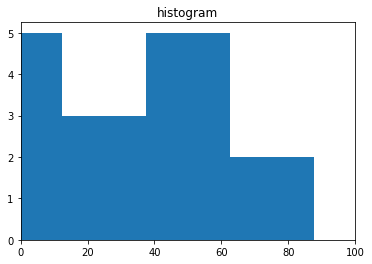

In [86]:
global_seed(100)
a = np.array([22,87,5,43,56,73,55,54,11,20,51,5,79,31,27]) 

#normal histograms
hist, bin_edges = np.histogram(a, bins =4,range=(0,100))
print(hist)
print(bin_edges)
plt.bar(bin_edges[:-1], hist, width = 25)
plt.xlim(min(bin_edges), max(bin_edges))
plt.title("histogram") 
plt.show()

Differentially private histogram:

[7 2 3 2]
[  0.  25.  50.  75. 100.]


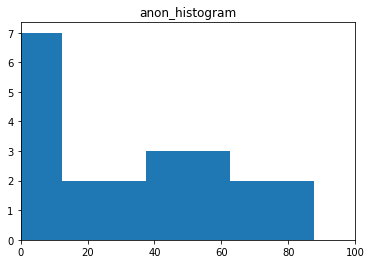

In [87]:
hist, bin_edges = histogram(a,epsilon=1, bins =4,range=(0,100))
print(hist)
print(bin_edges)
plt.bar(bin_edges[:-1], hist, width = 25)
plt.xlim(min(bin_edges), max(bin_edges))
plt.title("anon_histogram") 
plt.show()